In [2]:
import pandas as pd

# List of stock symbols
stocks = [
    "ACB", "BCM", "BID", "BVH", "CTG", "FPT", "GAS", "GVR", "HDB", "HPG", "MBB", "MSN", "MWG",
    "PLX", "POW", "SAB", "SHB", "SSB", "SSI", "STB", "TCB", "TPB", "VCB", "VHM", "VIB", "VIC",
    "VJC", "VNM", "VPB", "VRE"
]

# Initialize the clustering dictionary
clustering = {
    'Stock': [],
    'Average_Percentage_Increase': [],
    'Price_Std_dev': []
}

# Function to convert volume column to numeric values
def convert_volume(vol):
    vol_str = str(vol)
    if 'M' in vol_str:
        return float(vol_str.replace('M', '')) * 1_000_000
    elif 'K' in vol_str:
        return float(vol_str.replace('K', '')) * 1_000
    else:
        return float(vol_str)

# Loop through each stock and process the data
for stock in stocks:
    file_path = f"D:\\Study Program\\Project\\Price\\{stock}_Price.csv"
    # Read the CSV file
    df = pd.read_csv(file_path)
    
    # Remove commas and convert Price-related columns to float
    df['Close'] = df['Price'].str.replace(',', '').astype(float)
    df['Open'] = df['Open'].str.replace(',', '').astype(float)
    df['High'] = df['High'].str.replace(',', '').astype(float)
    df['Low'] = df['Low'].str.replace(',', '').astype(float)
    df = df.drop(columns=['Change %', "Price"])
    
    # Convert Vol. column to numeric by handling 'K' and 'M' suffixes
    df['Vol.'] = df['Vol.'].apply(convert_volume)
    
    # Convert Date column to datetime   
    
    df['Date'] = pd.to_datetime(df['Date'])
    
    # Sort by date
    df = df.sort_values(by='Date')
    
    # Extract year from Date
    df['Year'] = df['Date'].dt.year
    
    # Calculate yearly average closing prices
    yearly_avg = df.groupby('Year')['Close'].mean().reset_index()
    
    # Calculate yearly percentage increase in price
    yearly_avg['Price_Percentage_Increase'] = yearly_avg['Close'].pct_change() * 100
    
    # Calculate average percentage increase excluding NaN values
    if len(yearly_avg) > 1:
        average_percentage_increase = yearly_avg['Price_Percentage_Increase'].iloc[1:].mean()
    else:
        average_percentage_increase = 0
    
    # Calculate the standard deviation of the closing prices
    price_std_dev = df['Close'].std()
    
    # Append results to clustering dictionary
    clustering['Stock'].append(stock)
    clustering['Average_Percentage_Increase'].append(average_percentage_increase)
    clustering['Price_Std_dev'].append(price_std_dev)

# Convert clustering dictionary to DataFrame
clustering_df = pd.DataFrame(clustering)
clustering_df.to_csv("D:\\Study Program\\Project\\Clustering\\Clustering.csv", index= False)
# Print the DataFrame
print(clustering_df)


   Stock  Average_Percentage_Increase  Price_Std_dev
0    ACB                    12.012754    7461.349728
1    BCM                    24.322237   23118.556053
2    BID                    20.796647   12476.797969
3    BVH                     4.833024   16520.008099
4    CTG                    10.918428    8365.736957
5    FPT                    15.878089   28260.609811
6    GAS                     5.862116   21469.138408
7    GVR                    32.006184    8971.362190
8    HDB                    12.467037    4558.815141
9    HPG                    25.254771   10530.251457
10   MBB                    21.760100    7080.187149
11   MSN                     5.048338   23178.617960
12   MWG                    23.499799   18163.692978
13   PLX                    -6.823387   12676.799854
14   POW                    -2.139443    2161.509098
15   SAB                    -9.959423   56832.356700
16   SHB                    11.593055    4666.601267
17   SSB                    -3.528864    3996.

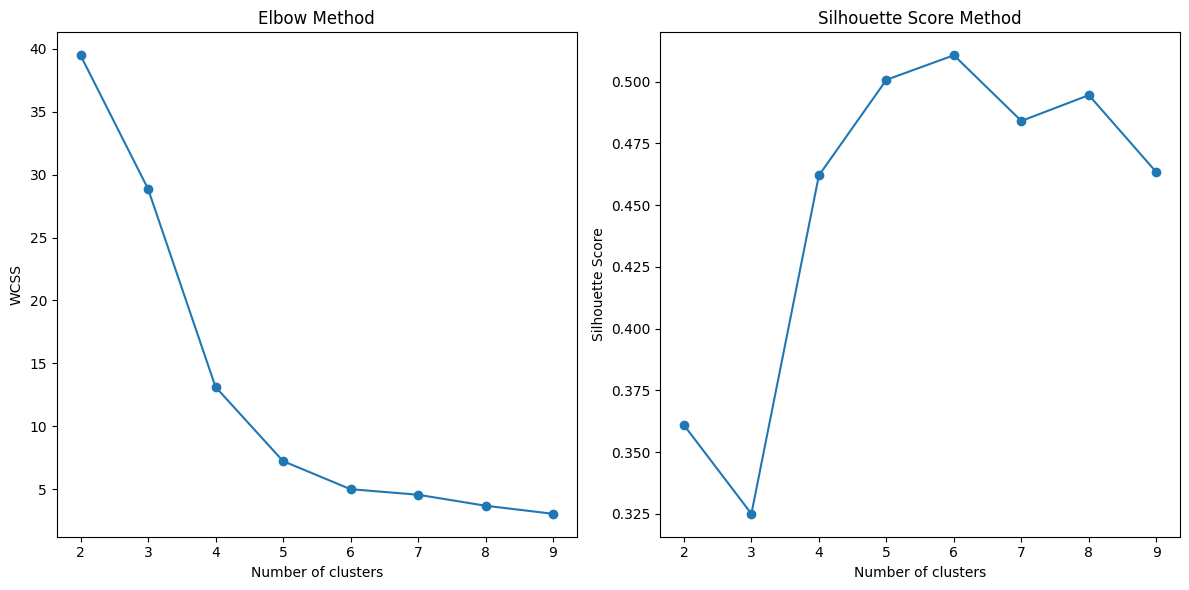

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import silhouette_score
# Create DataFrame
df = pd.read_csv("D:\\Study Program\\Project\\Clustering\\Clustering.csv")
df = pd.DataFrame(df)

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['Average_Percentage_Increase', 'Price_Std_dev']])

# Determine the optimal number of clusters using the Elbow Method and Silhouette Score
wcss = []
silhouette_scores = []
K_range = range(2, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_scaled, kmeans.labels_))

# Plotting the Elbow Method and Silhouette Score
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(K_range, wcss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')

plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method')

plt.tight_layout()
plt.show()



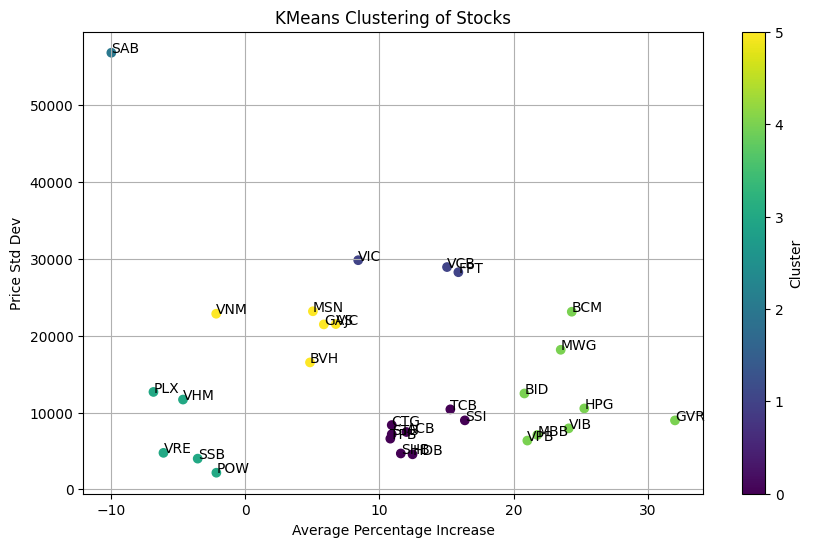

In [4]:
# Choosing the number of clusters (let's go with 3 as per the previous analysis)
optimal_k = 6
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
df['Cluster'] = kmeans.fit_predict(df_scaled)


# Plotting the final clusters with stock names
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['Average_Percentage_Increase'], df['Price_Std_dev'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Average Percentage Increase')
plt.ylabel('Price Std Dev')
plt.title('KMeans Clustering of Stocks')
plt.colorbar(label='Cluster')

# Annotate each point with the stock name
for i, txt in enumerate(df['Stock']):
    plt.annotate(txt, (df['Average_Percentage_Increase'][i], df['Price_Std_dev'][i]))

plt.grid(True)
plt.show()

In [5]:
cluster =df[['Stock', 'Average_Percentage_Increase', 'Price_Std_dev', 'Cluster']]
cluster.to_csv("D:\\Study Program\\Project\\Clustering\\Clustering.csv", index = False)

In [6]:
cluster

,Stock,Average_Percentage_Increase,Price_Std_dev,Cluster
0,ACB,12.012754,7461.349728,0
1,BCM,24.322237,23118.556053,4
2,BID,20.796647,12476.797969,4
3,BVH,4.833024,16520.008099,5
4,CTG,10.918428,8365.736957,0
5,FPT,15.878089,28260.609811,1
6,GAS,5.862116,21469.138408,5
7,GVR,32.006184,8971.362190,4
8,HDB,12.467037,4558.815141,0
9,HPG,25.254771,10530.251457,4
